In [ ]:
import os
import re

# Your folder containing .txt files
folder_path = "shakespeares-works_TXT_FolgerShakespeare"
combined_lines = []

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as f:
            text = f.read()

            # Normalize newlines and upper-case ACT headings
            text = text.replace('\r\n', '\n').replace('\r', '\n')
            match = re.search(r'\bACT\s+1\b', text, flags=re.IGNORECASE)
            if match:
                start_idx = match.start()
                content = text[start_idx:]
                combined_lines.append(content)

# Join all processed plays into a single corpus
final_text = "\n\n".join(combined_lines)

# Save to a training file
with open("shakespeare_full_cleaned.txt", "w", encoding="utf-8") as out_file:
    out_file.write(final_text)

print("✅ Combined and cleaned dataset saved to 'shakespeare_full_cleaned.txt'")

🔢 Characters: 5020926
📏 Lines: 173952
🧠 Words: 925524
🧾 Unique Words (Vocab Size): 23806
🗨️ Avg Words per Line: 5.32

📈 Top 15 Most Frequent Words:
the: 27684
and: 26891
i: 23045
to: 20746
of: 17232
a: 15040
you: 14773
my: 12468
that: 11448
in: 11111
is: 9485
not: 8642
he: 8104
with: 8008
me: 7939


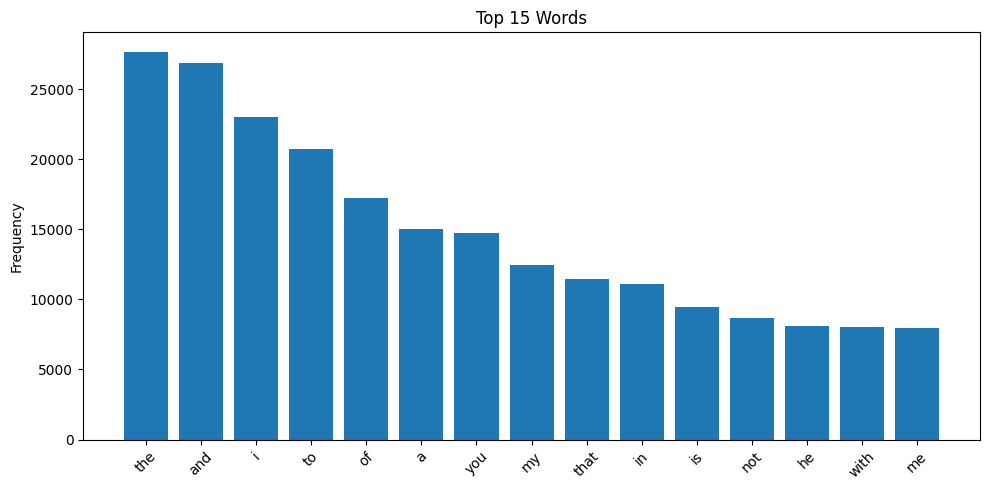

In [1]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load your dataset
with open("shakespeare_full_cleaned.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Character & line stats
num_chars = len(text)
lines = text.splitlines()
num_lines = len(lines)

# Word-level analysis
words = re.findall(r"\b\w+\b", text.lower())
num_words = len(words)
vocab = set(words)
vocab_size = len(vocab)
word_freq = Counter(words)

# Print basic stats
print(f"🔢 Characters: {num_chars}")
print(f"📏 Lines: {num_lines}")
print(f"🧠 Words: {num_words}")
print(f"🧾 Unique Words (Vocab Size): {vocab_size}")
print(f"🗨️ Avg Words per Line: {num_words / num_lines:.2f}")

# Most frequent words
print("\n📈 Top 15 Most Frequent Words:")
for word, freq in word_freq.most_common(15):
    print(f"{word}: {freq}")

# Optional: Plot top 15
top_words, top_counts = zip(*word_freq.most_common(15))
plt.figure(figsize=(10,5))
plt.bar(top_words, top_counts)
plt.title("Top 15 Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()